This notebook contains the realization of the results presented for the MCMC and EM algorithm in the assignment for SF2955 Computer intensive methods in mathematical statistics. We start with MCMC, and the EM results are presented after that.

# Markov Chain Monte Carlo Demo


### Initializating the model
To initialize a model, you create and instance of the CoalMineModel class defined in MCMC.py, which takes the following inputs:
- `t1`    - The starting year $t_1$ for the collected data 
- `tn`        - The ending year $t_n$ for the collected data
- `d`         - The assumed number $d$ of intensities present inthe data
- `vartheta`  - The hyperprior parameter $\vartheta$ for $\theta \sim \Gamma(2,\vartheta)$ 

Example:
```
model = CoalMineModel(1850,1960,2,1)
```
Which is the same as 
```
model = CoalMineModel(t1=1850,tn=1960,d=2,vartheta=1)
```

### Performing inference
Now that we have initialized the model, we can perform inference. We use the random walk proposal. The inference method takes the following parameters as input:
- `rho` - Tuning parameter $\rho$ for the Metropolis-Hasting update
- `taus` - The observed data $\boldsymbol{\tau}$ (as a numpy array)
- `N` - The number of iterations we run the MCMC algorithm
-  `burn_in` - Burn in parameter for the MCMC algorithm

Assuming that  `model` is the variable name for the initialized model, running
```
model.inference(0.5,datafile,100000,10000)
```
Which is the same as
```
model.inference(rho=0.5,taus=datafile,N=100000,burn_in=10000)
```
Or to run using the independent proposal, 
```
model.inference(0.5,datafile,100000,10000,"independent")
```
Which is the same as
```
model.inference(rho=0.5,taus=datafile,N=100000,burn_in=10000,proposal="independent")
```
### Analysis
After performing inference we can now analyse the parameters of interest, namely $\theta$, $\textbf{t}$, $\boldsymbol{\lambda}$, which is done by looking at the samples from $p(\theta|\textbf{t}, \boldsymbol{\tau}, \boldsymbol{\lambda})$,  $p(\textbf{t}|\theta, \boldsymbol{\tau}, \boldsymbol{\lambda})$ and $p(\boldsymbol{\lambda}|\theta, \boldsymbol{\tau}, \textbf{t})$ which we have after performing inference. The CoalMineModel class has two methods to aid in this analysis, one based on histograms and another based on parameter evolution over the $N$ iterations (after burn-in). Note that both of these methods can only be used after inference is done on the model in question.

#### Histogram based analysis
```
model.plot_posterior_histogram()
```
Shows the histograms for each of the posterior distributions for all the parameters of interest. These plots are saved onto the current directory. Has an optional parameter `figsize` to change figure size, default is [10,8]. By default it returns the Figure object and also shows the plot, to save the separate figures in the current directory set `mode="save"` like below.
```
model.plot_posterior_histogram(mode="save")
```

#### Sample based analysis
```
model.plot_posterior_samples()
```
For $\theta$ and $\lambda_i : i \in \{1,...,d\}$, this method shows the samples and mean of the posterior distributions $p(\theta|\textbf{t}, \boldsymbol{\tau}, \boldsymbol{\lambda})$ and  $p(\lambda_i|\boldsymbol{\lambda}_{-i},\theta, \boldsymbol{\tau}, \textbf{t})$ at each iteration of the algorithm.  For $\textbf{t}$, it shows how $\{t_2,...,t_d\}$ changes at each iteration. Has an optional parameter `freq` which is the frequency at which we sample quantites to make these plots, default is 1. By default it returns the Figure object and also shows the plot, to save the separate figures in the current directory set `mode="save"` just like for the histograms.

### Other
To perform some other type of analysis, you can always call the `get_posterior_samples` method on a model which returns all the samples as a Python dict with the keys `thetas`, `lambdas` and `ts`. As you can imagine this can only be used after performing inference on the model in question, and you use these to generate your own plots, statistics etc.

Example:
```
samples = model.get_posterior_samples()
thetas  = samples["thetas"]
lambdas = samples["lambdas"]
ts      = samples["ts"]
# Some code using thetas,lambdas,ts
```

In [1]:
from MCMC import CoalMineModel
from numpy import genfromtxt
coaldata = genfromtxt('coal-mine.csv', delimiter=',')

### Analysis
#### Section 1: Changing $d$. Here we set $\vartheta=2$ and $\rho=0.5$

Average time to sample θ is 0.0000145s, λ is 0.0000435s, t is 0.0000909s
Metropolis-Hastings acceptance rate was 4.96% with d=2 and rho=0.5
Average time to sample θ is 0.0000144s, λ is 0.0000476s, t is 0.0000925s
Metropolis-Hastings acceptance rate was 1.70% with d=3 and rho=0.5
Average time to sample θ is 0.0000145s, λ is 0.0000523s, t is 0.0000981s
Metropolis-Hastings acceptance rate was 1.24% with d=4 and rho=0.5
Average time to sample θ is 0.0000134s, λ is 0.0000530s, t is 0.0000951s
Metropolis-Hastings acceptance rate was 0.73% with d=5 and rho=0.5


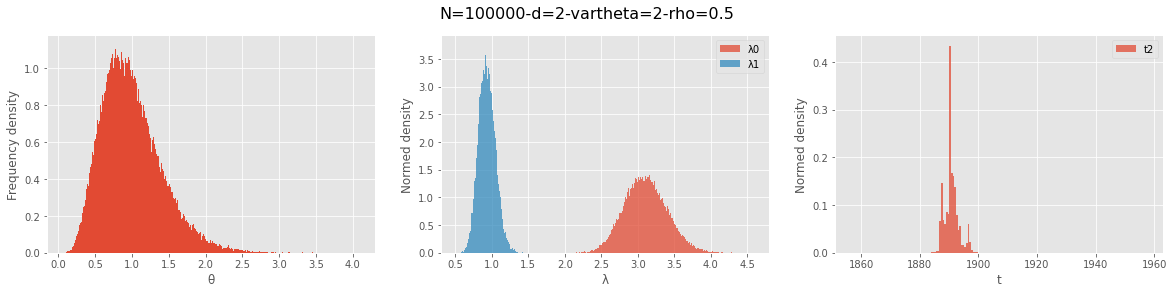

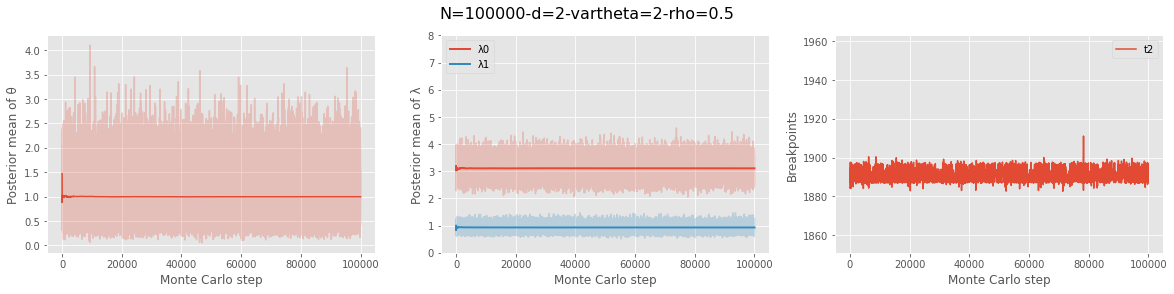

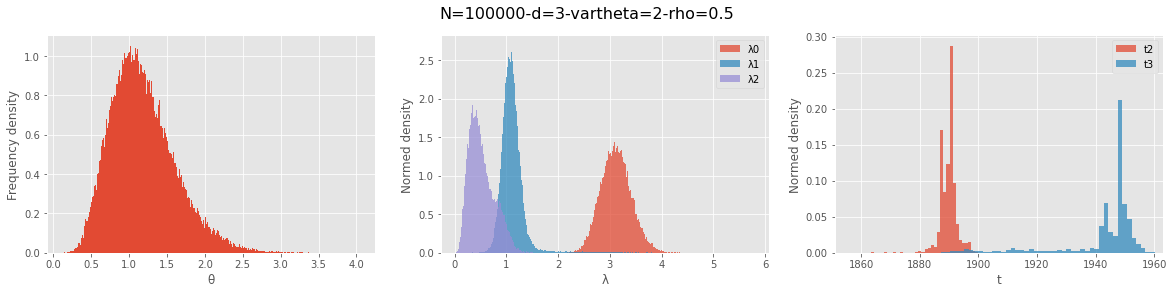

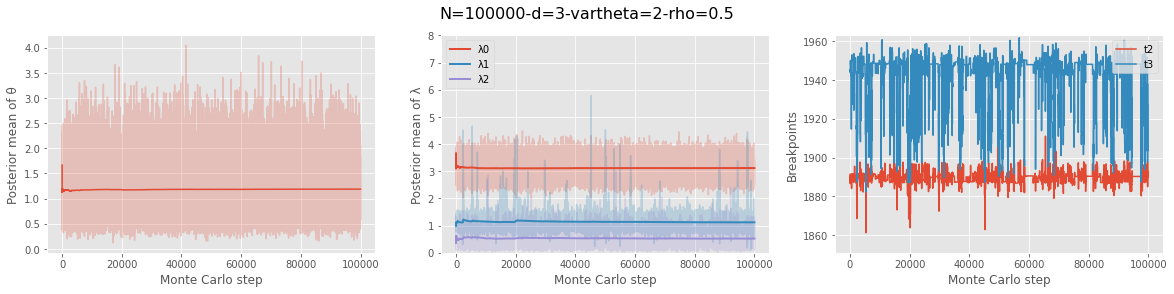

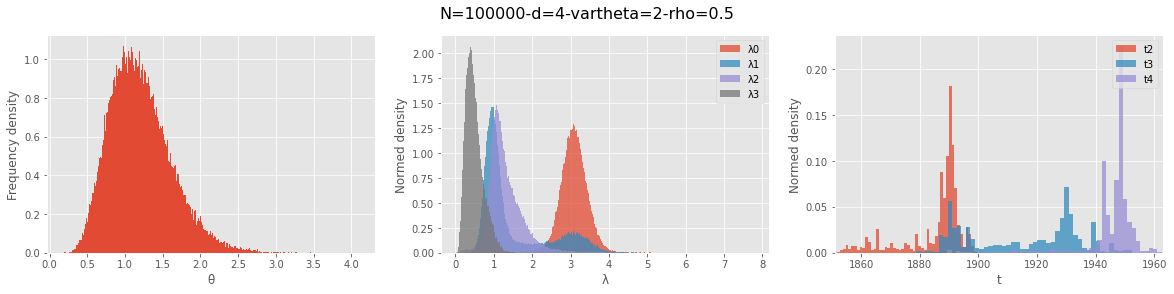

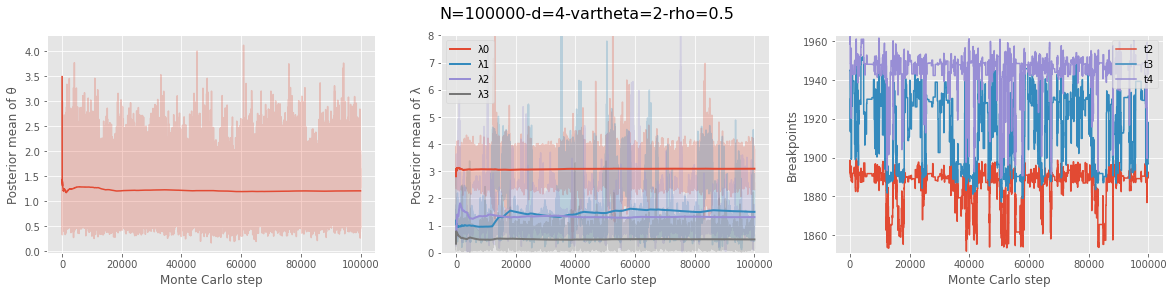

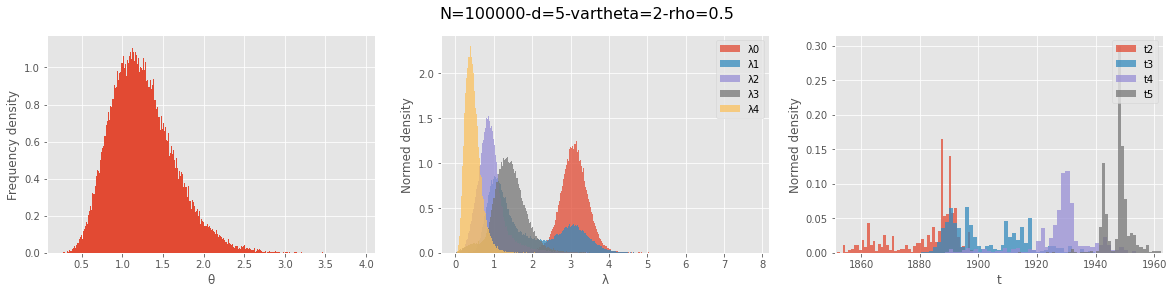

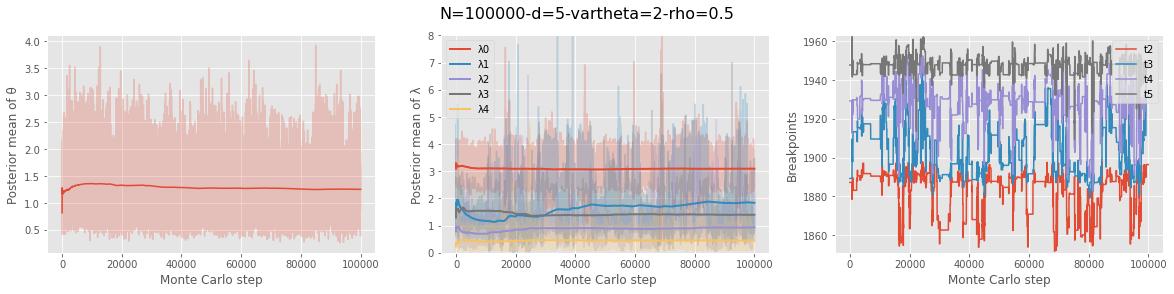

In [2]:
# We keep these constant throughout our analysis
# Note in each cell youre running 4 models so might take a few seconds
N = 100000
burn_in=10000

# Create models
model_d2 = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=2)
model_d3 = CoalMineModel(t1=1851,tn=1963,d=3,vartheta=2)
model_d4 = CoalMineModel(t1=1851,tn=1963,d=4,vartheta=2)
model_d5 = CoalMineModel(t1=1851,tn=1963,d=5,vartheta=2)

# Perform inference
model_d2.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)
model_d3.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)
model_d4.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)
model_d5.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)



# Generate plots
hist_d2    = model_d2.plot_posterior_histogram()
samples_d2 = model_d2.plot_posterior_samples()

hist_d3    = model_d3.plot_posterior_histogram()
samples_d3 = model_d3.plot_posterior_samples()

hist_d4    = model_d4.plot_posterior_histogram()
samples_d4 = model_d4.plot_posterior_samples()

hist_d5    = model_d5.plot_posterior_histogram()
samples_d5 = model_d5.plot_posterior_samples()

#### Section 2: Changing $\vartheta$. Here we set $d=2$ and $\rho=0.5$

Average time to sample θ is 0.0000138s, λ is 0.0000418s, t is 0.0000877s
Metropolis-Hastings acceptance rate was 4.96% with d=2 and rho=0.5
Average time to sample θ is 0.0000134s, λ is 0.0000401s, t is 0.0000848s
Metropolis-Hastings acceptance rate was 5.13% with d=2 and rho=0.5
Average time to sample θ is 0.0000138s, λ is 0.0000415s, t is 0.0000868s
Metropolis-Hastings acceptance rate was 4.89% with d=2 and rho=0.5
Average time to sample θ is 0.0000138s, λ is 0.0000413s, t is 0.0000871s
Metropolis-Hastings acceptance rate was 4.89% with d=2 and rho=0.5


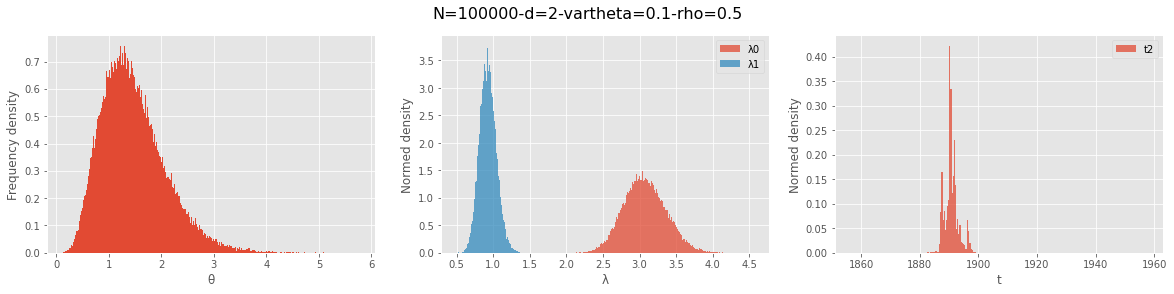

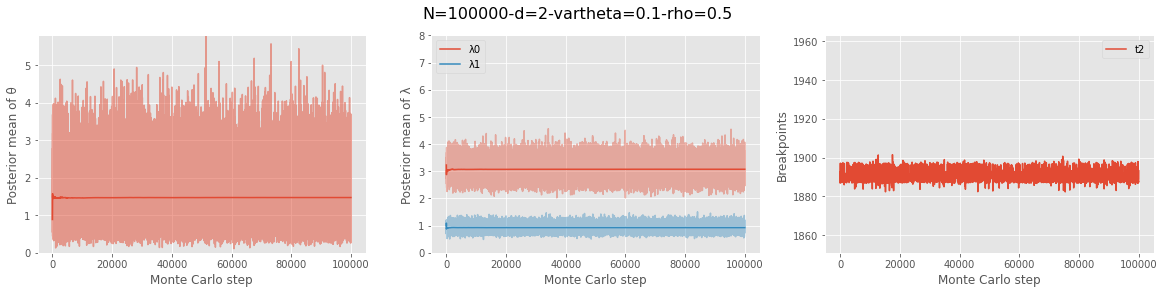

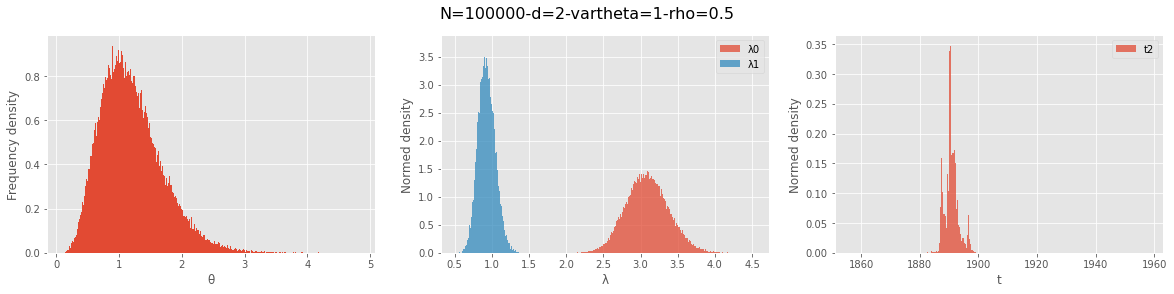

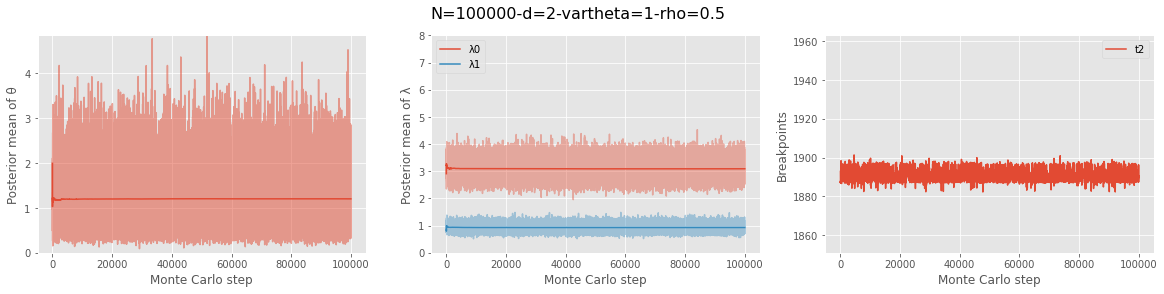

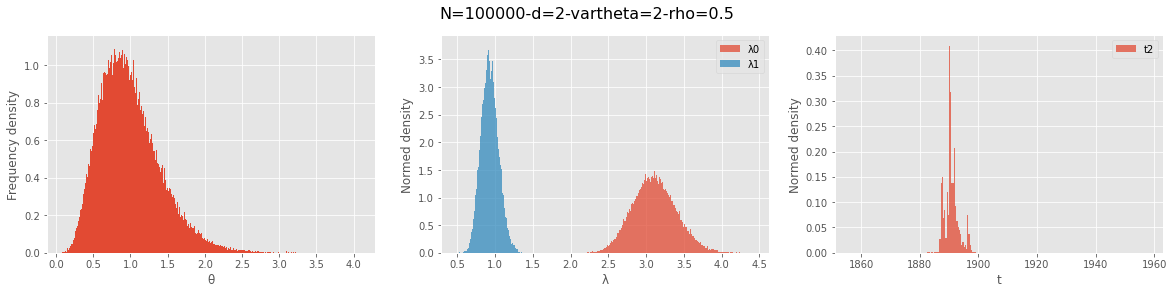

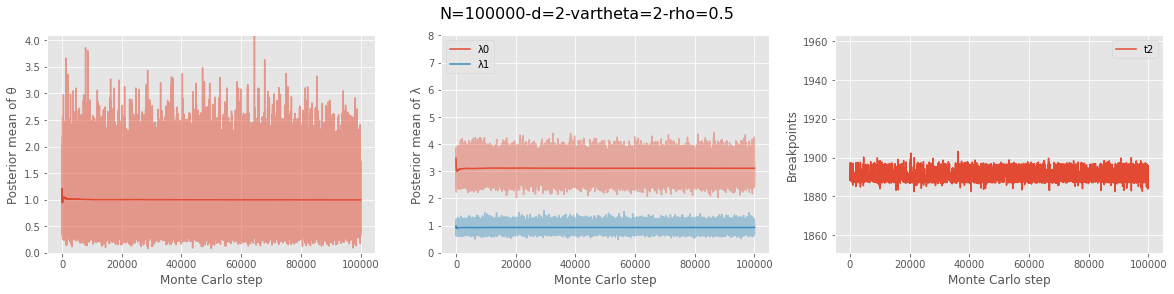

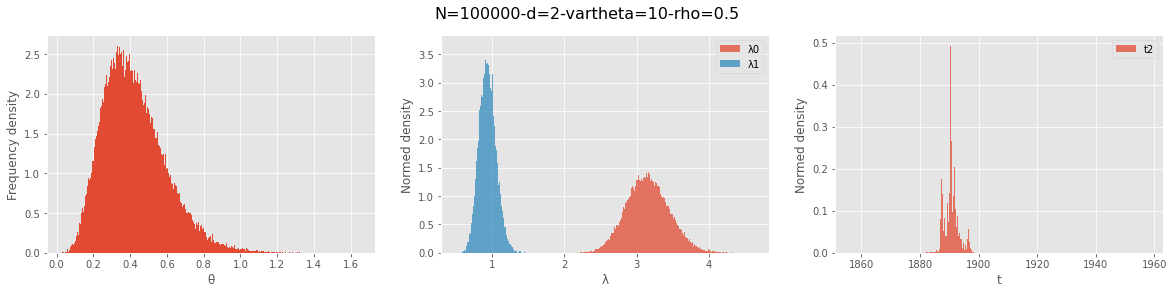

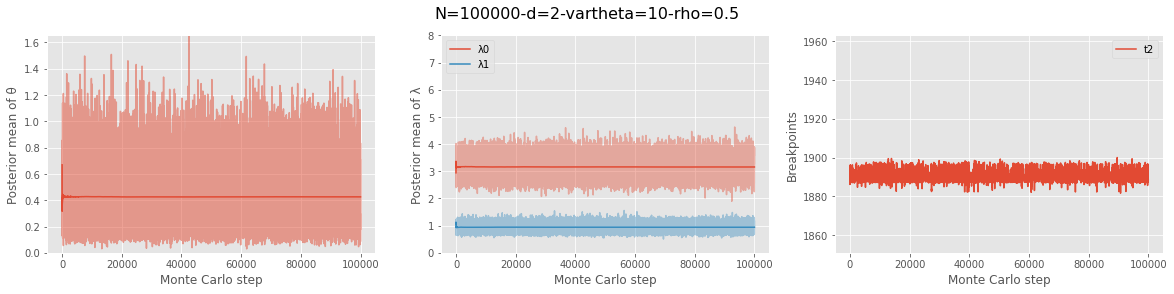

In [3]:
# Create models
model_vt01 = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=0.1)
model_vt1 = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=1)
model_vt2 = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=2)
model_vt10 = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=10)

# Perform inference
model_vt01.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)
model_vt1.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)
model_vt2.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)
model_vt10.inference(rho=0.5,taus=coaldata,N=N,burn_in=burn_in)



# Generate plots
hist_vt01      = model_vt01.plot_posterior_histogram()
samples_vt01  = model_vt01.plot_posterior_samples()

hist_vt1      = model_vt1.plot_posterior_histogram()
samples_vt1   = model_vt1.plot_posterior_samples()

hist_vt2      = model_vt2.plot_posterior_histogram()
samples_vt2   = model_vt2.plot_posterior_samples()

hist_vt10     = model_vt10.plot_posterior_histogram()
samples_vt10  = model_vt10.plot_posterior_samples()

#### Section 3: Changing $\rho$. Here we set $d=2$ and $\vartheta=2$

Average time to sample θ is 0.0000150s, λ is 0.0000451s, t is 0.0000984s
Metropolis-Hastings acceptance rate was 69.56% with d=2 and rho=0.01
Average time to sample θ is 0.0000143s, λ is 0.0000433s, t is 0.0000942s
Metropolis-Hastings acceptance rate was 24.78% with d=2 and rho=0.1
Average time to sample θ is 0.0000145s, λ is 0.0000440s, t is 0.0000752s
Metropolis-Hastings acceptance rate was 1.23% with d=2 and rho=2
Average time to sample θ is 0.0000145s, λ is 0.0000440s, t is 0.0000725s
Metropolis-Hastings acceptance rate was 0.84% with d=2 and rho=3


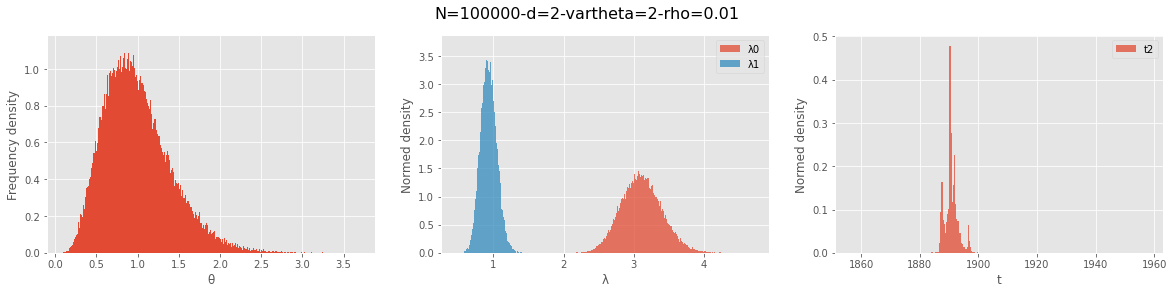

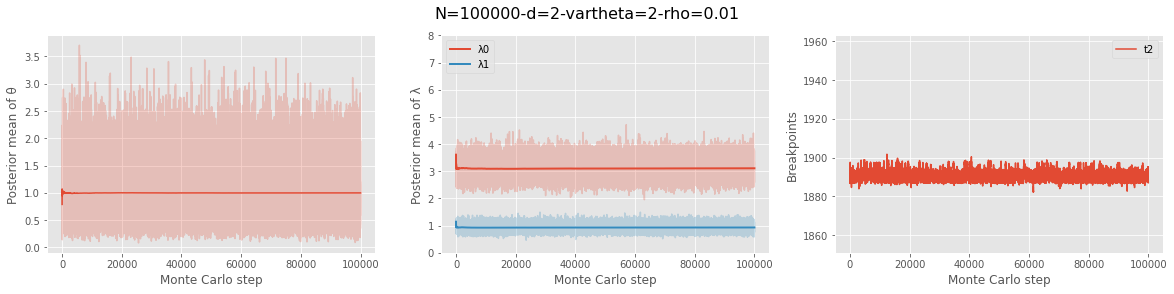

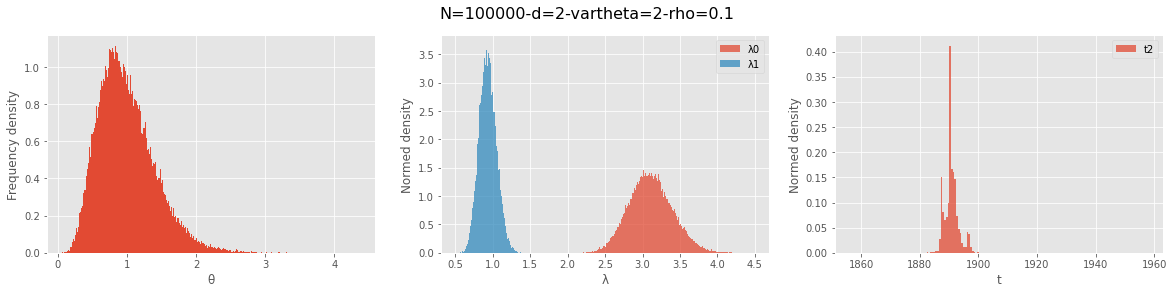

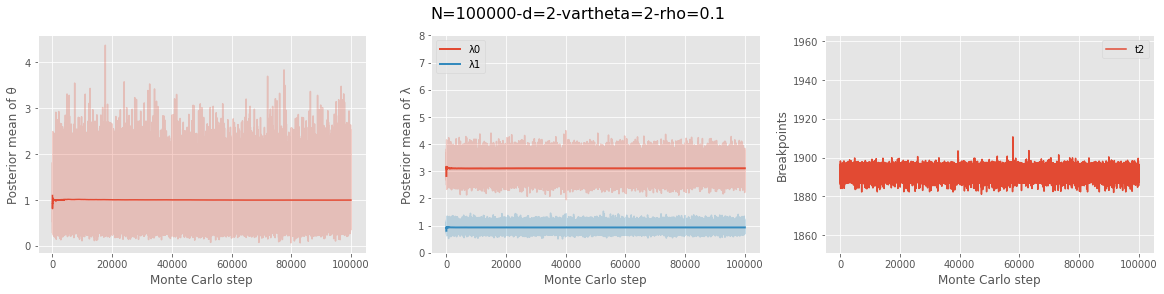

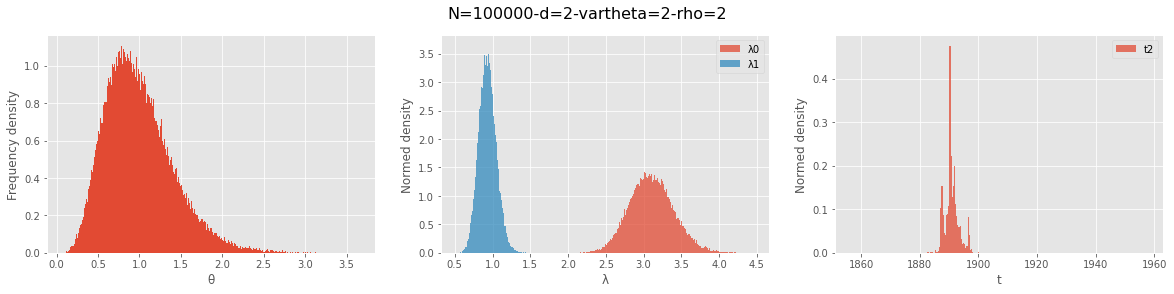

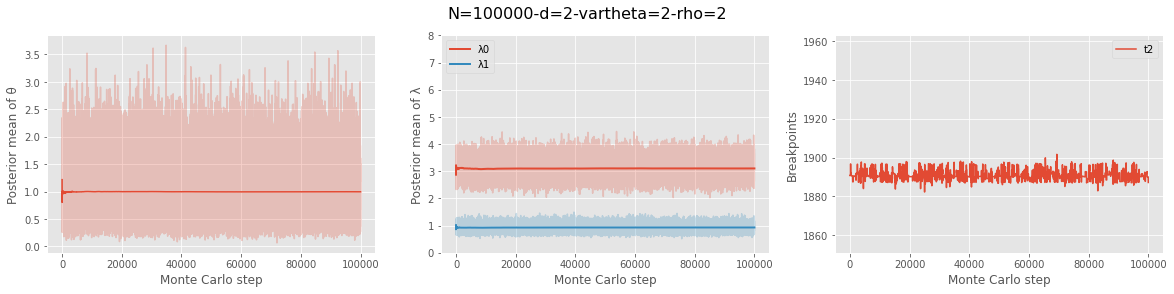

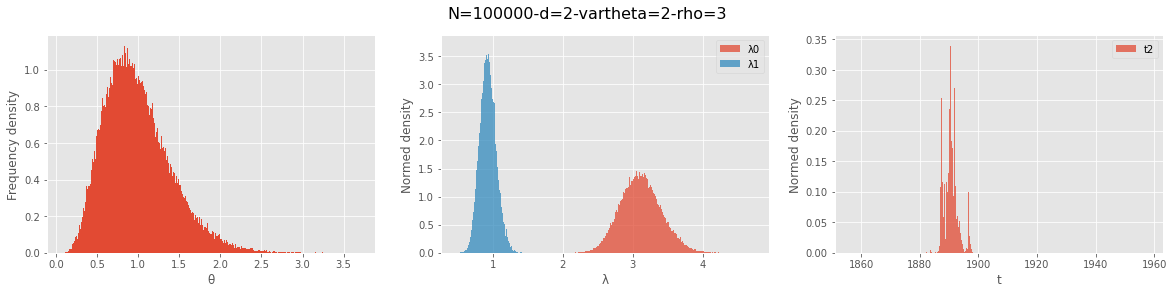

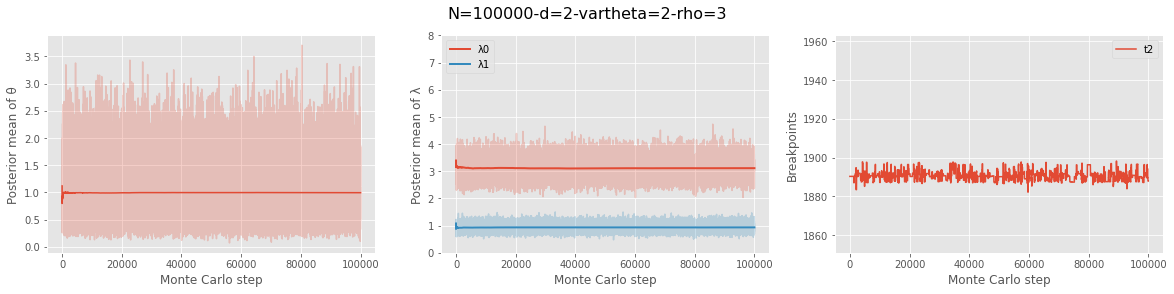

In [11]:
# Create models
model_rh001 = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=2)
model_rh01  = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=2)
model_rh2   = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=2)
model_rh3   = CoalMineModel(t1=1851,tn=1963,d=2,vartheta=2)

# Perform inference
model_rh001.inference(rho=0.01,taus=coaldata,N=N,burn_in=burn_in)
model_rh01.inference(rho=0.1,taus=coaldata,N=N,burn_in=burn_in)
model_rh2.inference(rho=2,taus=coaldata,N=N,burn_in=burn_in)
model_rh3.inference(rho=3,taus=coaldata,N=N,burn_in=burn_in)



# Generate plots
hist_rh001    = model_rh001.plot_posterior_histogram()
samples_rh001 = model_rh001.plot_posterior_samples()

hist_rh01     = model_rh01.plot_posterior_histogram()
samples_rh01  = model_rh01.plot_posterior_samples()

hist_rh2      = model_rh2.plot_posterior_histogram()
samples_rh2   = model_rh2.plot_posterior_samples()

hist_rh3      = model_rh3.plot_posterior_histogram()
samples_rh3   = model_rh3.plot_posterior_samples()

#### Section 3.5: Changing $\rho$. Here we set $d=4$ and $\vartheta=2$

Average time to sample θ is 0.0000140s, λ is 0.0000503s, t is 0.0001108s
Metropolis-Hastings acceptance rate was 66.91% with d=4 and rho=0.01
Average time to sample θ is 0.0000145s, λ is 0.0000524s, t is 0.0001144s
Metropolis-Hastings acceptance rate was 19.94% with d=4 and rho=0.1
Average time to sample θ is 0.0000137s, λ is 0.0000498s, t is 0.0000752s
Metropolis-Hastings acceptance rate was 0.04% with d=4 and rho=2
Average time to sample θ is 0.0000130s, λ is 0.0000479s, t is 0.0000718s
Metropolis-Hastings acceptance rate was 0.01% with d=4 and rho=3


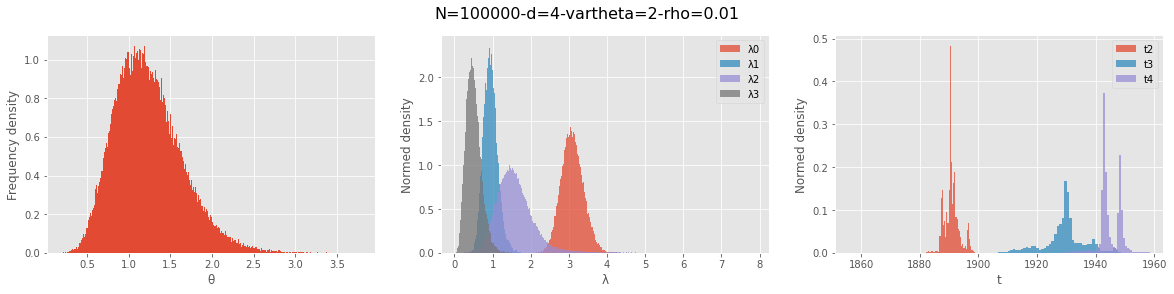

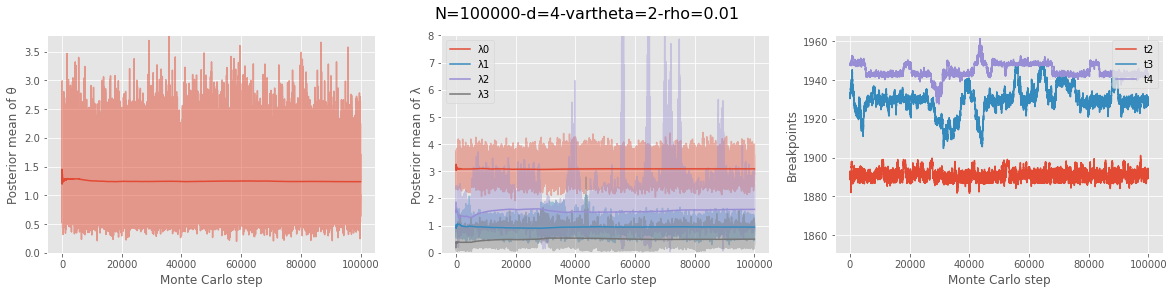

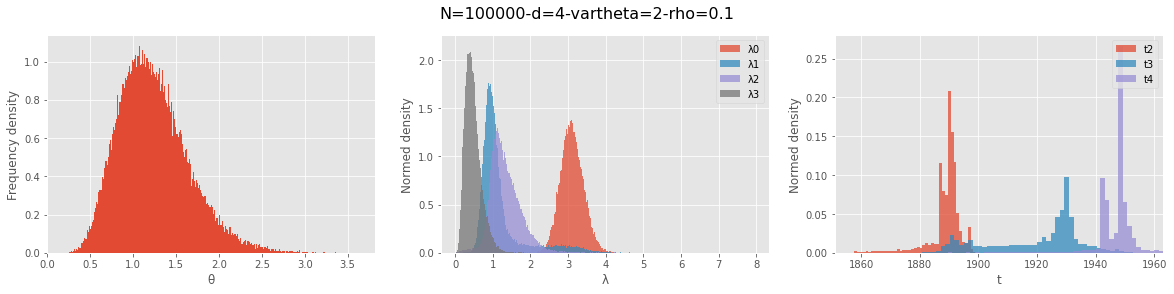

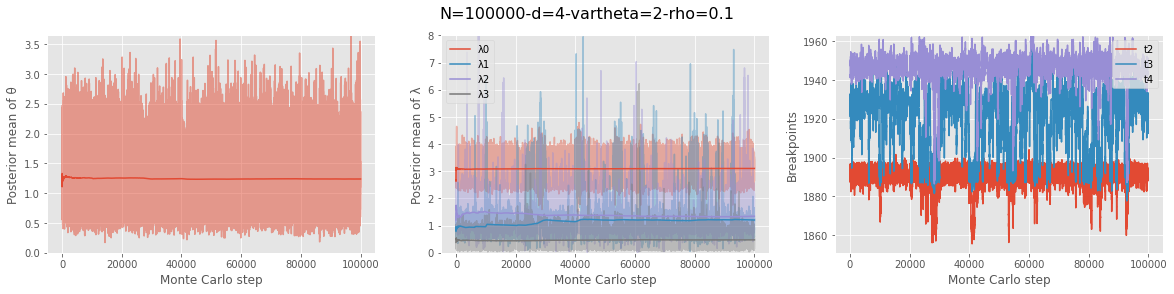

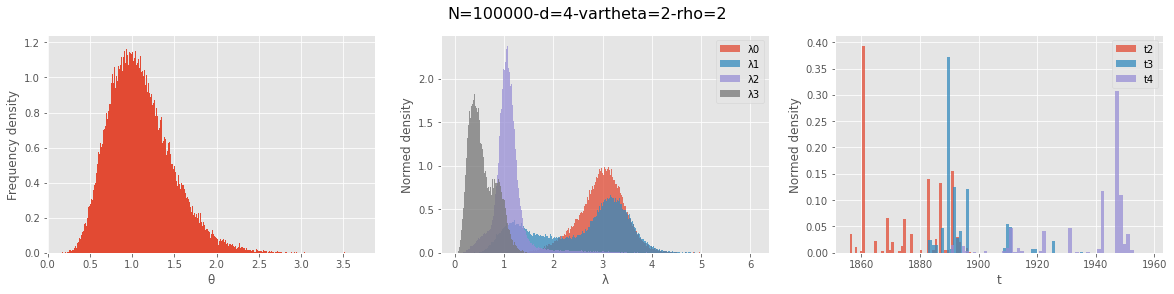

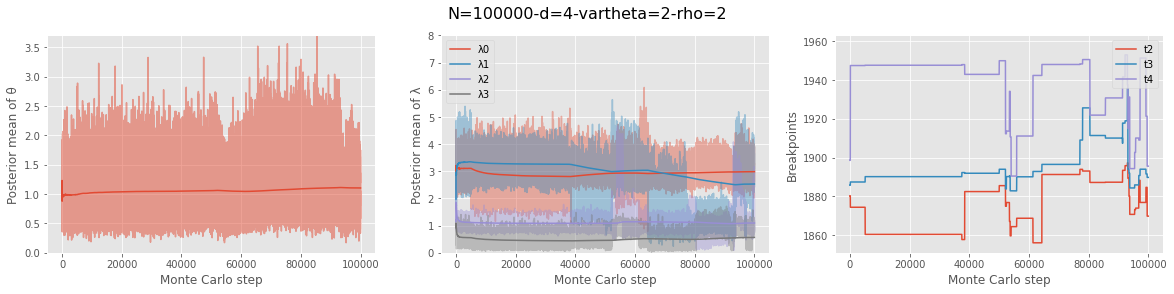

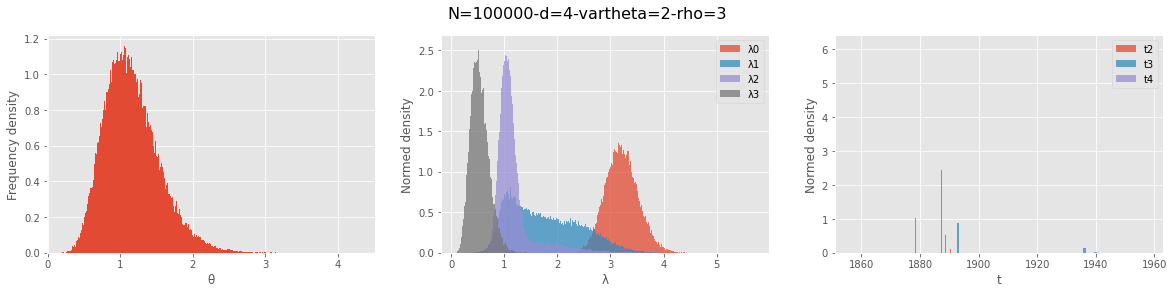

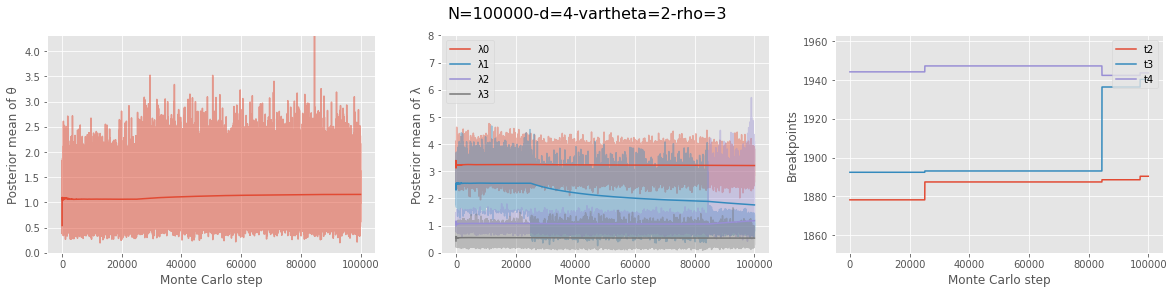

In [5]:
# Create models
model_rh001d4 = CoalMineModel(t1=1851,tn=1963,d=4,vartheta=2)
model_rh01d4  = CoalMineModel(t1=1851,tn=1963,d=4,vartheta=2)
model_rh2d4   = CoalMineModel(t1=1851,tn=1963,d=4,vartheta=2)
model_rh3d4   = CoalMineModel(t1=1851,tn=1963,d=4,vartheta=2)

# Perform inference
model_rh001d4.inference(rho=0.01,taus=coaldata,N=N,burn_in=burn_in)
model_rh01d4.inference(rho=0.1,taus=coaldata,N=N,burn_in=burn_in)
model_rh2d4.inference(rho=2,taus=coaldata,N=N,burn_in=burn_in)
model_rh3d4.inference(rho=3,taus=coaldata,N=N,burn_in=burn_in)



# Generate plots
hist_rh001d4    = model_rh001d4.plot_posterior_histogram()
samples_rh001d4 = model_rh001d4.plot_posterior_samples()

hist_rh01d4     = model_rh01d4.plot_posterior_histogram()
samples_rh01d4  = model_rh01d4.plot_posterior_samples()

hist_rh2d4      = model_rh2d4.plot_posterior_histogram()
samples_rh2d4   = model_rh2d4.plot_posterior_samples()

hist_rh3d4      = model_rh3d4.plot_posterior_histogram()
samples_rh3d4   = model_rh3d4.plot_posterior_samples()

### Compact plot for empirical distribution and samples of $\theta$ for different $d$ with $\vartheta=2,\rho=0.5$
#### Note here you are using samples generated from running the above cells first

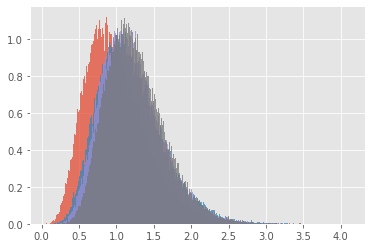

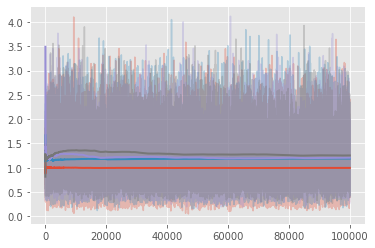

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

theta_d2 = model_d2.get_posterior_samples()["thetas"]
theta_d3 = model_d3.get_posterior_samples()["thetas"]
theta_d4 = model_d4.get_posterior_samples()["thetas"]
theta_d5 = model_d5.get_posterior_samples()["thetas"]

fig_thetas_d_hists,ax_thetas_d_hists = plt.subplots()
ax_thetas_d_hists.hist(theta_d2,bins=int(N/200),density=True,alpha=0.75)
ax_thetas_d_hists.hist(theta_d3,bins=int(N/200),density=True,alpha=0.75)
ax_thetas_d_hists.hist(theta_d4,bins=int(N/200),density=True,alpha=0.75)
ax_thetas_d_hists.hist(theta_d5,bins=int(N/200),density=True,alpha=0.75)
#fig_thetas_d_hists.savefig("theta_hists_d.png")


fig_thetas_d_samples,ax_thetas_d_samples = plt.subplots()
ns = np.linspace(1,N,N)
ax_thetas_d_samples.plot(theta_d2,alpha=0.3)
ax_thetas_d_samples.plot(theta_d3,alpha=0.3)
ax_thetas_d_samples.plot(theta_d4,alpha=0.3)
ax_thetas_d_samples.plot(theta_d5,alpha=0.3)

ax_thetas_d_samples.plot(np.cumsum(theta_d2)/ns,color="C0",linewidth=2.0)
ax_thetas_d_samples.plot(np.cumsum(theta_d3)/ns,color="C1",linewidth=2.0)
ax_thetas_d_samples.plot(np.cumsum(theta_d4)/ns,color="C2",linewidth=2.0)
ax_thetas_d_samples.plot(np.cumsum(theta_d5)/ns,color="C3",linewidth=2.0)
#fig_thetas_d_samples.savefig("theta_samples_d.png")
plt.show()

### Compact plot for empirical distribution and samples of $\theta$ for different $\vartheta$ with $d=2,\rho=0.5$
#### Note here you are using samples generated from running the above cells first

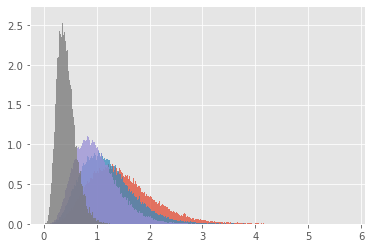

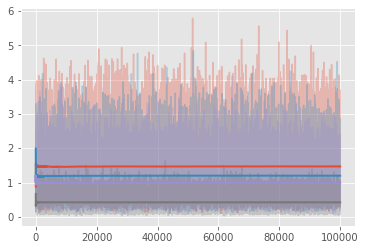

In [30]:

theta_vt01 = model_vt01.get_posterior_samples()["thetas"]
theta_vt1  = model_vt1.get_posterior_samples()["thetas"]
theta_vt2  = model_vt2.get_posterior_samples()["thetas"]
theta_vt10 = model_vt10.get_posterior_samples()["thetas"]

fig_thetas_vt_hists,ax_thetas_vt_hists = plt.subplots()
ax_thetas_vt_hists.hist(theta_vt01,bins=int(N/200),density=True,alpha=0.75)
ax_thetas_vt_hists.hist(theta_vt1,bins=int(N/200),density=True,alpha=0.75)
ax_thetas_vt_hists.hist(theta_vt2,bins=int(N/200),density=True,alpha=0.75)
ax_thetas_vt_hists.hist(theta_vt10,bins=int(N/200),density=True,alpha=0.75)
#fig_thetas_vt_hists.savefig("theta_hists_vt.png")


fig_thetas_vt_samples,ax_thetas_vt_samples = plt.subplots()
ns = np.linspace(1,N,N)
ax_thetas_vt_samples.plot(theta_vt01,alpha=0.3)
ax_thetas_vt_samples.plot(theta_vt1,alpha=0.3)
ax_thetas_vt_samples.plot(theta_vt2,alpha=0.3)
ax_thetas_vt_samples.plot(theta_vt10,alpha=0.3)

ax_thetas_vt_samples.plot(np.cumsum(theta_vt01)/ns,color="C0",linewidth=2.0)
ax_thetas_vt_samples.plot(np.cumsum(theta_vt1)/ns,color="C1",linewidth=2.0)
ax_thetas_vt_samples.plot(np.cumsum(theta_vt2)/ns,color="C2",linewidth=2.0)
ax_thetas_vt_samples.plot(np.cumsum(theta_vt10)/ns,color="C3",linewidth=2.0)
#fig_thetas_vt_samples.savefig("theta_samples_vt.png")
plt.show()

### Final parameters, posterior means for $d=2,\vartheta=2,\rho=0.1$
#### Note here you are using samples generated from running the above cells first

In [12]:
samples = model_rh01.get_posterior_samples()
lambdas_final = samples["lambdas"]
thetas_final  = samples["thetas"]
ts_final = samples["ts"]
print(np.mean(lambdas_final,axis=1))
print(np.mean(thetas_final))
print(np.mean(ts_final[1]))

[3.10928363 0.93379538]
0.9959973299831414
1890.7812142569953


# Expectation Maximization Demo

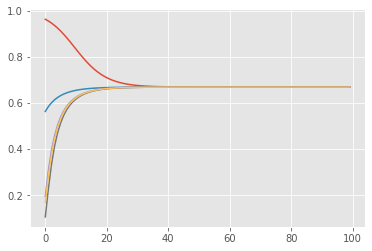

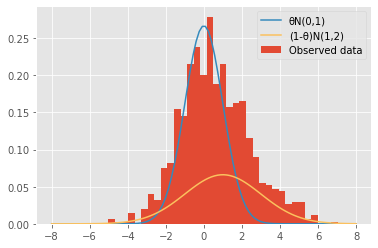

In [9]:

mixdata = genfromtxt('mixture-observations.csv', delimiter=',')

# Defining the density functions on our own
norm_pdf = lambda mu,sigma: lambda x: (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(((x-mu)/sigma)**2)).reshape(1,-1)
y_given_x0 = norm_pdf(0,1)
y_given_x1 = norm_pdf(1,2)

# number of thetas to see if they all converge
plots = 5

# How long to run EM for
EM_iters    = 100

# To store solutons
thetas      = np.zeros((EM_iters,plots))
thetas[0,:] = np.random.rand(plots)

# EM Iterations
for i in range(EM_iters-1):
    y_x1 = y_given_x1(mixdata)
    y_x0 = y_given_x0(mixdata)
    thetas[i+1,:] = np.mean((thetas[i,:].reshape(-1,1)*y_x1)/((1-thetas[i,:].reshape(-1,1))*y_x0 + (thetas[i,:].reshape(-1,1))*y_x1 ),axis=1)

# Plot theta iterations
fig_emiters, ax_emiters = plt.subplots()
ax_emiters.plot(thetas)
#plt.savefig("EMconvergence.png")

# Getting the converged theta value to plot the density functions
theta = thetas[-1,0]

fig_emhist,ax_emhist = plt.subplots()
ax_emhist.hist(mixdata,bins=35,density=True,label="Observed data")
xs=np.linspace(-8,8,100)
ax_emhist.plot(xs, theta*y_given_x0(xs) .flatten(),label="θN(0,1)")
ax_emhist.plot(xs, (1-theta)*y_given_x1(xs).flatten(),label="(1-θ)N(1,2)",color="C4")
ax_emhist.legend()
#plt.savefig("EMhistogram.png")
plt.show()